In [ ]:
#1) In 250-500 words, write a thorough explanation in markdown in your notebook of when to use ML and when not to.

Machine learning is best used when there is data that needs to be sorted, filtered, or determinations need to be made between different types of data. Machine Learning is best used when there’s too much data for coders to go through and evaluate. So, the AI, through Machine Learning will sort and go through the data and create the regulations for it to be sorted. For more concrete data that has a clear answer, Supervised Machine Learning is used, where a clear algorithm is made to train the AI model being used. It’s used for both classification and regression issues, including image classification, diagnostics, identity fraud detection and more. And for regression problems Supervised Machine Learning is used for weather forecasting, market forecasting expecting life expectancy, etc. Now, for Unsupervised Machine Learning, it’s used to sort and filter through data that does not have a clear answer. It’s used for Targeted Marketing, Customer Segmentation, Structure Discovery, etc. Reinforcement Learning is a type of Machine Learning that has the AI learn how to make decisions for the best and proper outcomes. It’s used for Game AI, Robot Navigations, learning Tasks, etc. Machine Learning is not useful for small amounts of data where the AI can’t be properly trained or data that can be solved through simple logic. Also, Machine Learning itself can’t be used if the data is unlabeled since the AI can’t be learned at all. Also, Machine Learning isn’t useful for data that has constant changing data where values change drastically or when the pattern that’s used cant be used.  

In [ ]:
#2) Perform pre-processing on the dataset. Clearly use markdown to indicate each pre-processing step you are using. 

In [121]:
import pandas as pd
import numpy as np
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import time

td = pd.read_csv("titanic.csv")
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
#Using np.where to change the lowercase male/female to uppercase for better reading. 
td["Sex"] = np.where(td["Sex"] == "male", "Male",
                                np.where(td["Sex"] == "female", "Female", ""))
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
#Change the location to a value of 1, 2, or 3 for faster processing. 
em = {'C':1,'Q':2, 'S':3}
td['Embarked'] = td['Embarked'].map(em)
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,3.0
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,3.0


In [64]:
# One hot encoding Embarked data set to make data reading easier  
td = pd.get_dummies(td, columns = ['Embarked'])
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_1.0,Embarked_2.0,Embarked_3.0
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,False,False,True


In [ ]:
#3) Create a correlation matrix with a heatmap for the features. Use markdown to write about your takeaways in under 200 words.

In [72]:

td2 = td[['Pclass','Age','Parch','Fare','Survived']]
td2.corr()

,Pclass,Age,Parch,Fare,Survived
Pclass,1.000000,-0.369226,0.018443,-0.549500,-0.338481
Age,-0.369226,1.000000,-0.189119,0.096067,-0.077221
Parch,0.018443,-0.189119,1.000000,0.216225,0.081629
Fare,-0.549500,0.096067,0.216225,1.000000,0.257307
Survived,-0.338481,-0.077221,0.081629,0.257307,1.000000


<Axes: >

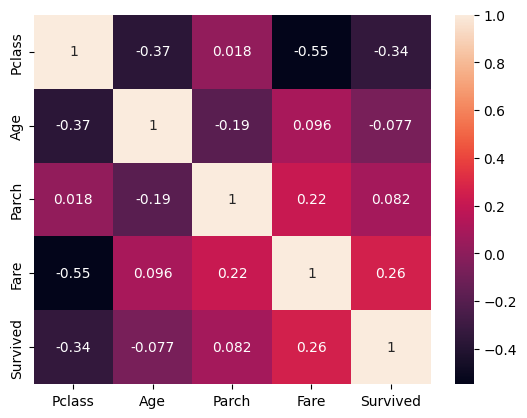

In [73]:
sns.heatmap(td2.corr(), annot=True)

Based on reading the data there are some interesting facts, like how Fare and Survival have a postive correlation, but not too close at 0.26 showing that as fair went up or down, survival does as well. Age and Survival have a negative correlation, showing that as age goes up or down, survival varies which makes sense because children were often saved first with women. Lastly, Fare and Class have a bad correlation at -0.55, meaning that high class paid more for the trip, which always makes sense.

In [ ]:
#4) Create a box and whisker plot for loan_amounts if using the Lending Club dataset and fare if using the Titanic dataset.

{'whiskers': [<matplotlib.lines.Line2D at 0x1fafad8eb80>,
 'caps': [<matplotlib.lines.Line2D at 0x1fafad9c100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fafad8e8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fafad9c640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fafad9c8e0>],
 'means': []}

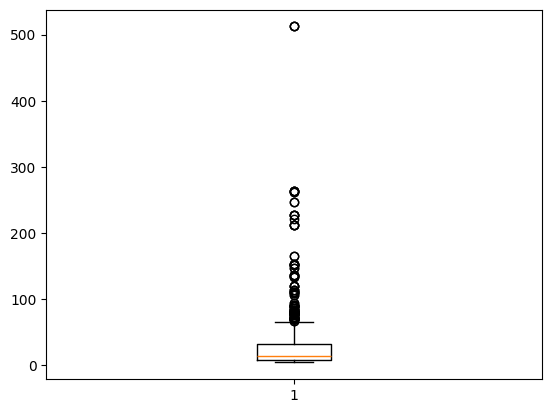

In [77]:
fl = td['Fare'][td['Fare'] != 0]
plt.boxplot(fl)

The box and whisker shows that the data is skewed down to around $10 - $50 which makes sense because there's more 3rd class options usually on boats for regular people, and those paying for higher class seats will always pay a higher amount, which shows the outlier up top. I guessed that the null values would either equal 0 or not have a value since they couldn't be tracked due to the dead. So those values aren't shown in the actual plot. 

In [ ]:
#5)  If using the Titanic dataset: create a new column called age_bin that groups people into at least 4 age ranges. 

In [162]:
def Lam1(data):
    
    F = time.perf_counter()
    Al1 = td['Age'].tolist()
    Age_Bin1 = list(map(lambda x: "<20" if x<20 
                         else "21-40" if 21<=x<40 
                         else "41-60" if 41<=x<60 
                         else "60+", Al1))
    td['Age_Bin']= Age_Bin1
    E = time.perf_counter()
    END = E-F
    print(END)
Lam1(td['Age'])
td.head(10)

0.0006493000000773463


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bin,Age_Bin2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-40,21-40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,21-40,21-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-40,21-40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,21-40,21-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,21-40,21-40
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,60+,<20
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,41-60,41-60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,<20,<20
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,21-40,21-40
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,<20,<20


In [150]:
F2 = time.perf_counter()
Al2 = tdf['Age'].tolist()
Age_Bin2 = list(map(lambda x:"60+" if x>=60 else "41-60" 
                             if 41<=x<60 else "21-40" 
                             if 21<=x<40 else "<20", Al2))
td['Age_Bin2'] = Age_Bin2
E2 = time.perf_counter()
END2 = E2-F2
print(END2)
td.head(10)

0.0009291999995184597


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bin,Age_Bin2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-40,21-40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,21-40,21-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-40,21-40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,21-40,21-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,21-40,21-40
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,60+,<20
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,41-60,41-60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,<20,<20
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,21-40,21-40
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,<20,<20


The first lam goes from 20-60 while the second lam goes 60-20, which they both seem to work well, do to the randomness of the function it's hard to tell which is better but on average, I saw that the first lam had larger values, which means that it's a little better. 

In [ ]:
#6)  If using the Titanic dataset, create subplot histograms to show how fares differ by age_bin. 

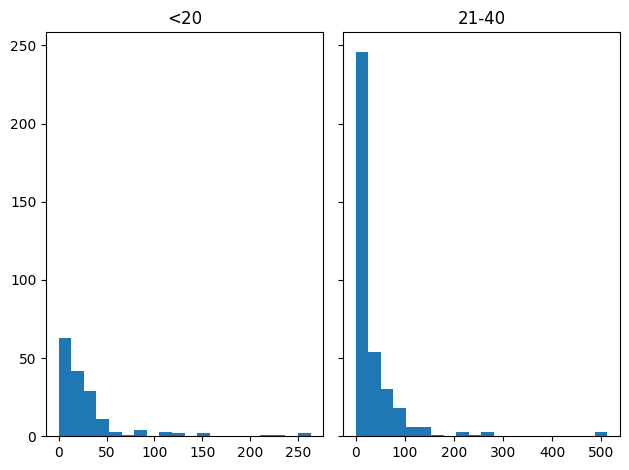

In [160]:
td1 = td[td['Age_Bin'] == '<20']
td2 = td[td['Age_Bin'] == '21-40']
td3 = td[td['Age_Bin'] == '41-60']
td4 = td[td['Age_Bin'] == '60+']

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(td1['Fare'], bins=20)
axs[0].set_title('<20')
axs[1].hist(td2['Fare'], bins=20)
axs[1].set_title('21-40')

plt.show()

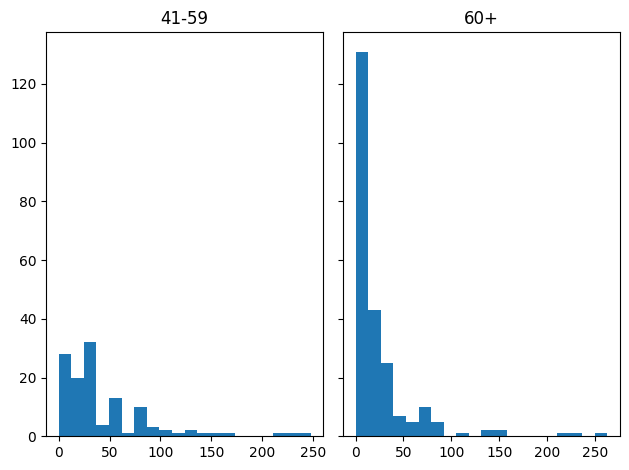

In [161]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(td3['Fare'], bins=20)
axs[0].set_title('41-59')
axs[1].hist(td4['Fare'], bins=20)
axs[1].set_title('60+')

plt.show()

The data shows the relation between fare and age, from here we can see that most under 20 were paying less than 50, a vast majority of 21-40 and 60+ paid 0, which most likely passed away since those are null values, and 41-59 were more varied, but still more paid less than 100. 

In [ ]:
#)Quiz 6 

In [ ]:
#1)Select a model to predict the outcome. You are trying to predict if someone lives or dies for the Titanic dataset.

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [172]:
#To be honest, I'm using this method because it's the one that I slightly understand so far, I still need practice. 
X = td[['Pclass','Fare']]
y = td['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)

regression = LogisticRegression(random_state=42).fit(X_train, y_train)
y_predicted = regression.predict(X_test)

regression.score(X_test, y_test)

0.6791044776119403

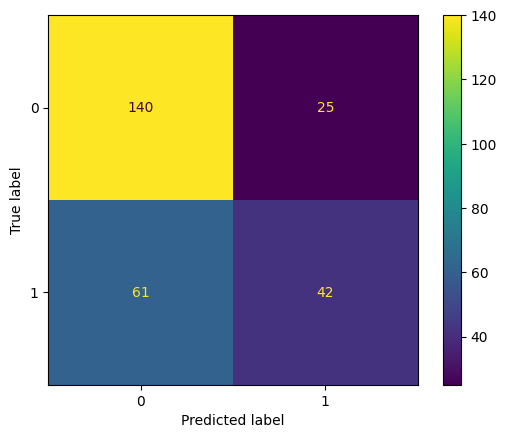

In [174]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)

In [178]:
def pre(calc_type:str, tp: int, tn: int,
                        fp: int, fn: int) -> float:
    """
    This function produces precision or recall based on
    what is passed in
    """
    if calc_type == "p":
        value = tp / (tp + fp)
        return value
    elif calc_type == "r":
        value = tp / (tp + fn) 
        return value
    else:
        error_msg = "something happened here. check your inputs"
        return error_msg

In [179]:
p_a_r("p", 42, 140, 25, 61)

0.6268656716417911